In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [23]:
df = pd.read_csv('../../Merged_Fundamentals_and_Polls/merged_df_final.csv', index_col=0)

##### Data Imputation

In [24]:
df.at[2, 'Month_8'] = 52.5
df.at[3, 'Month_8'] = 41.75
df.at[0, 'Month_11'] = 48
df.at[1, 'Month_11'] = 52

In [25]:
display(df.head())

,President_winning,Date,NAP06,NAP07,NAP08,NAP09,NAP10,Current_President_Seeking_Reelection,Early_Stopping_Previous,2nd_Mandate_Prev_Pres,Year0,Year1,Year2,Electiony1,Electiony2,Electiony3,Electiony4,payroll_y1,payroll_y2,payroll_y3,payroll_ey1,payroll_ey2,payroll_ey3,rdi_y0,rdi_y1,rdi_y2,rdi_ey,Stock_y1,Stock_y2,Stock_y3,Stock_ey,Month_10,Month_11,Month_6,Month_7,Month_8,Month_9,Name,Year,Winner,Democrat_Republican,popular_votes,popular_vote_percentage,El_winner
0,Truman,1948,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,45.000,48.0,38.0,37.0,36.50,39.5,Harry S. Truman,1948,1,1,24179347,49.55,1
1,Truman,1948,0.48,0.52,0.60,0.65,0.68,0.0,0.0,0.0,2238.932,2068.901,2055.103,2086.017,2120.450,2132.598,2134.981,38600,43093,44411,45178,45294,45245,-1.1,-1.1,-4.1,5.3,0.2665,-0.0814,0.0223,-0.0213,50.000,52.0,49.0,48.0,48.50,46.5,Thomas E. Dewey,1948,0,0,21991292,45.07,0
2,Eisenhower,1952,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,50.667,49.5,59.0,50.0,52.50,55.0,Dwight D. Eisenhower,1952,1,0,34075529,55.18,1
3,Eisenhower,1952,0.33,0.34,0.32,0.31,0.30,0.0,0.0,1.0,2102.251,2383.291,2513.690,2540.550,2546.022,2564.401,2648.621,42942,46706,48006,48924,49320,49597,0.8,9.2,3.4,3.5,0.1288,0.1763,0.1437,0.0842,39.333,39.5,31.0,43.0,41.75,40.5,Aldai Stevenson II,1952,0,1,27375090,44.33,0
4,Eisenhower,1956,0.68,0.70,0.72,0.74,0.76,1.0,0.0,0.0,2662.482,2735.091,2914.993,2903.671,2927.665,2925.035,2973.179,50240,48942,51429,52631,52604,52777,4.8,1.4,6.7,4.8,-0.0377,0.4396,0.2077,0.0227,51.000,59.0,62.0,61.0,52.00,52.0,Dwight D. Eisenhower,1956,1,0,35579180,57.37,1


##### Train/Test split

In [26]:
X = df.drop(['President_winning', 'Date', 'Early_Stopping_Previous','popular_vote_percentage', 'Winner', 'Name', 'Year', 'El_winner'], axis=1)
Y = df['popular_vote_percentage']
X_train = X.drop([36,37])
y_train = Y.drop([36,37])
X_test = X.iloc[[36,37]]
y_test = Y.iloc[[36,37]]

In [27]:
X_train['state_election'] = 1*X_train['Current_President_Seeking_Reelection'] -1*X_train['2nd_Mandate_Prev_Pres']
X_train.drop(['Current_President_Seeking_Reelection', '2nd_Mandate_Prev_Pres'], axis=1, inplace=True)

In [28]:
X_test['state_election'] = 1*X_test['Current_President_Seeking_Reelection'] -1*X_test['2nd_Mandate_Prev_Pres']
X_test.drop(['Current_President_Seeking_Reelection', '2nd_Mandate_Prev_Pres'], axis=1, inplace=True)

C:\Users\David\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\envs\cs109a\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##### Data Standardization

In [29]:
Scaler = StandardScaler().fit(X_train)
X_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [211]:
alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100,1000]  # regularization parameters for Lasso

#### Creating the PCA vectors

In [209]:
X_pca = X_scaled
pca = PCA().fit(X_pca)
X_scaled_PCA = pca.transform(X_scaled)
X_test_PCA = pca.transform(X_test_scaled)
print(pca.explained_variance_ratio_)

[4.22986130e-01 1.70564824e-01 1.20893148e-01 6.76652721e-02
 5.50654291e-02 3.83720977e-02 2.90835995e-02 2.64725378e-02
 1.59433006e-02 1.45613548e-02 9.15544193e-03 8.54337012e-03
 6.15969185e-03 5.51733752e-03 3.56155520e-03 2.28558550e-03
 8.40086921e-04 7.99309189e-04 5.64189911e-04 4.69547680e-04
 2.32502938e-04 1.54997859e-04 6.81348536e-05 3.68214796e-05
 3.73322879e-06 5.26562364e-32 2.71693579e-33 2.71693579e-33
 2.71693579e-33 2.71693579e-33 2.71693579e-33 2.71693579e-33
 2.71693579e-33 2.71693579e-33 2.71693579e-33]


#### Linear Regression with Scaled data

In [169]:
scores_lreg = cross_validate(LinearRegression(), X_scaled, y_train, cv=9, scoring='neg_mean_squared_error')
scores_lreg = np.mean(scores_lreg['test_score'])
scores_lreg

-72.53458439386266

#### Linear Regression with PCA 

In [180]:
scores_lreg_pca = cross_validate(LinearRegression(), X_scaled_PCA[:, :3], y_train, cv=9, scoring='neg_mean_squared_error')
scores_lreg_pca = np.mean(scores_lreg_pca['test_score'])
scores_lreg_pca

-7.6117620475178525

In [179]:
for d in range(1, 15):
    Lreg = LinearRegression(fit_intercept=True)
    scores_lreg_pca = cross_validate(Lreg, X_scaled_PCA[:, :d], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)['test_score']
    scores_lreg_pca = np.mean(scores_lreg_pca)
    print('With depth ', d, scores_lreg_pca)

With depth  1 -37.21100807467282
With depth  2 -18.141583593495337
With depth  3 -7.6117620475178525
With depth  4 -8.063201333572085
With depth  5 -8.667583338288502
With depth  6 -10.070466628848632
With depth  7 -10.631112969872355
With depth  8 -11.913928286218747
With depth  9 -13.101697417265473
With depth  10 -12.200969583813531
With depth  11 -12.644231071412971
With depth  12 -14.030831917981258
With depth  13 -14.86559605965408
With depth  14 -17.83185185624213


#### Lasso Regression with Scaled data

In [183]:
Lasso = LassoCV(alphas=alphas, fit_intercept=True, max_iter=2000)
scores_lasso = cross_validate(Lasso, X_scaled, y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1, return_estimator=True)

In [185]:
np.mean(scores_lasso['test_score'])

-13.77076411274527

#### Lasso Regression with PCA

In [176]:
Lasso = LassoCV(alphas=alphas, fit_intercept=True, max_iter=2000)
scores_lasso_pca = cross_validate(Lasso, X_scaled_PCA[:, :5], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)['test_score']
scores_lasso_pca = np.mean(scores_lasso_pca)
scores_lasso_pca


-7.587388801669093

In [181]:
for d in range(1, 15):
    Lasso = LassoCV(alphas=alphas, fit_intercept=True, max_iter=2000)
    scores_lasso_pca = cross_validate(Lasso, X_scaled_PCA[:, :d], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)['test_score']
    scores_lasso_pca = np.mean(scores_lasso_pca)
    print('With depth ', d, scores_lasso_pca)

With depth  1 -36.51729737413194
With depth  2 -17.460056041259936
With depth  3 -7.535059006935307
With depth  4 -7.531279980378681
With depth  5 -7.587388801669093
With depth  6 -7.617977299642716
With depth  7 -7.703972878548701
With depth  8 -7.907577526542157
With depth  9 -7.907577526542157
With depth  10 -9.009951721069742
With depth  11 -9.009951721069742
With depth  12 -9.388934024677264
With depth  13 -9.335732304707983
With depth  14 -9.335732304707983


#### Tree Based Regression with Scaled Data

In [198]:
depths = np.arange(1, 10, 1)
for depth in depths:
    score_tree = cross_validate(DecisionTreeRegressor(max_depth=depth), X_scaled, y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)
    score_tree= np.mean(score_tree['test_score'])
    print('With depth ', depth, score_tree)

With depth  1 -24.281343100659768
With depth  2 -12.686170397255966
With depth  3 -16.075269106230937
With depth  4 -14.107580863618828
With depth  5 -12.982847087191356
With depth  6 -16.041304494598762
With depth  7 -12.406658333333331
With depth  8 -16.016333333333343
With depth  9 -15.503438888888882


#### Tree Based Regression with PCA

In [200]:
depths = np.arange(1, 10, 1)
num_predictors = np.arange(1, 15, 1)
for depth in depths:
    for num_predictor in num_predictors:
        
        score_tree = cross_validate(DecisionTreeRegressor(max_depth=depth), X_scaled_PCA[:,:num_predictor], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)
        score_tree= np.mean(score_tree['test_score'])
        print('With depth ', depth, 'and PCA components ', num_predictor, score_tree)

With depth  1 and PCA components  1 -37.83347740854002
With depth  1 and PCA components  2 -20.3675200585022
With depth  1 and PCA components  3 -20.36752005850221
With depth  1 and PCA components  4 -20.367520058502198
With depth  1 and PCA components  5 -20.367520058502215
With depth  1 and PCA components  6 -20.367520058502205
With depth  1 and PCA components  7 -20.36752005850222
With depth  1 and PCA components  8 -20.367520058502222
With depth  1 and PCA components  9 -20.3675200585022
With depth  1 and PCA components  10 -20.367520058502233
With depth  1 and PCA components  11 -20.3675200585022
With depth  1 and PCA components  12 -20.367520058502215
With depth  1 and PCA components  13 -20.367520058502215
With depth  1 and PCA components  14 -20.367520058502205
With depth  2 and PCA components  1 -43.49494251200682
With depth  2 and PCA components  2 -21.80072720241969
With depth  2 and PCA components  3 -23.907040782666616
With depth  2 and PCA components  4 -24.33347411599994

#### Random Forest Regression

##### On initial Data

In [201]:
# Number of trees in random forest
n_estimators_over = [50, 90, 110, 150, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth_over = [int(x) for x in np.linspace(1, 8, num=5)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators_over,
               'max_features': max_features,
               'max_depth': max_depth_over,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,

               }
# Use the random grid to search for best hyperparameters

rf = RandomForestRegressor()
random_model = GridSearchCV(estimator=rf, param_grid=random_grid, verbose=1,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1, return_train_score=True, cv=2, refit=True)
random_model.fit(X_scaled, y_train)
dict_rf = cross_validate(RandomForestRegressor(**random_model.best_params_), X_scaled, y_train, cv=9, scoring='neg_mean_squared_error')
rf_initial_mse = np.mean(dict_rf['test_score'])

Fitting 2 folds for each of 900 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.8min finished


In [202]:
rf_initial_mse

-9.929047643788575

##### On PCA data

In [208]:
# Number of trees in random forest
n_estimators_over = [10, 30, 50, 90]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth_over = [int(x) for x in np.linspace(1, 8, num=5)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators_over,
               'max_features': max_features,
               'max_depth': max_depth_over,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,

               }
# Use the random grid to search for best hyperparameters

rf = RandomForestRegressor()
random_model = GridSearchCV(estimator=rf, param_grid=random_grid, verbose=1,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1, return_train_score=True, cv=2, refit=True)
depths = np.arange(1, 15, 1)
for depth in depths:
    random_model.fit(X_scaled_PCA[:, :d], y_train)
    dict_rf = cross_validate(RandomForestRegressor(**random_model.best_params_), X_scaled_PCA[:, :d], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)
    rf_pca_mse = np.mean(dict_rf['test_score'])
    print('With components ', depth, 'the CV score is ', rf_pca_mse)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


With components  14 the CV score is  -17.944625945467923
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.2min finished


With components  14 the CV score is  -25.147155232974033
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -18.505151239505793
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -17.685358275118926
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.2min finished


With components  14 the CV score is  -18.623555652583086
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -20.39124941205905
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.2min finished


With components  14 the CV score is  -16.066767677666547
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -32.219200783786626
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


With components  14 the CV score is  -18.053259839672968
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -18.130890966012643
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -17.536163964621196
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 626 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


With components  14 the CV score is  -15.864297791035066
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -17.206835867962596
Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


With components  14 the CV score is  -16.82902893655694


#### Boosting Regression

##### On scaled data

In [218]:
depths = np.linspace(1,10,10)

# Base Estimator
#base_estimator = [DecisionTreeRegressor(max_depth = depth) for depth in depths]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Learning Rate
learning_rate = [1e-3,1e-2,1e-1,1,10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
scores = []
params_scaled = []
for depth in depths:
    # Create a based model
    ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth))
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2, scoring = 'neg_mean_squared_error')
    grid_search.fit(X_scaled, y_train)
    dict_boosting = cross_validate(AdaBoostRegressor(**grid_search.best_params_), X_scaled, y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)
    boosting_mse = np.mean(dict_boosting['test_score'])
    print('With components ', depth, 'the CV score is ', boosting_mse)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


With components  1.0 the CV score is  -11.045278902188432
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished


With components  2.0 the CV score is  -10.905027942596467
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


With components  3.0 the CV score is  -10.607899082244938
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


With components  4.0 the CV score is  -11.255416875551502
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  5.0 the CV score is  -10.506640999639416
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


With components  6.0 the CV score is  -8.594188453895246
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


With components  7.0 the CV score is  -10.276359908824176
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  8.0 the CV score is  -9.491702952693363
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  9.0 the CV score is  -8.866341822389824
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


With components  10.0 the CV score is  -10.435626619662646


##### With PCA

In [219]:
depths = np.linspace(1,10,10)
num_components = np.arange(1, 15, 1)
# Base Estimator
#base_estimator = [DecisionTreeRegressor(max_depth = depth) for depth in depths]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Learning Rate
learning_rate = [1e-3, 1e-2, 1e-1, 1, 10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
scores = []
params= []
for num_component in num_components:
    for depth in depths:
        # Create a based model
        ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth))
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2, scoring = 'neg_mean_squared_error')
        grid_search.fit(X_scaled, y_train)
        dict_boosting = cross_validate(AdaBoostRegressor(**grid_search.best_params_), X_scaled_PCA[:, :num_component], y_train, cv=9, scoring='neg_mean_squared_error', n_jobs=-1)
        boosting_mse = np.mean(dict_boosting['test_score'])
        print('With components ', depth, 'the CV score is ', boosting_mse, 'and with a number of PC ', num_component)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


With components  1.0 the CV score is  -43.30111747722821 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished


With components  2.0 the CV score is  -40.29822599231022 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


With components  3.0 the CV score is  -38.46266069290095 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  4.0 the CV score is  -40.98544072315835 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  5.0 the CV score is  -41.56796893089855 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  6.0 the CV score is  -43.08219250468491 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


With components  7.0 the CV score is  -40.694042250072755 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished


With components  8.0 the CV score is  -39.229619701800424 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


With components  9.0 the CV score is  -39.116971449119085 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  10.0 the CV score is  -39.575663994365094 and with a number of PC  1
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


With components  1.0 the CV score is  -27.525494004920066 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished


With components  2.0 the CV score is  -21.072372959647435 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


With components  3.0 the CV score is  -24.946994892950286 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


With components  4.0 the CV score is  -30.090366470515203 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.8s finished


With components  5.0 the CV score is  -21.978077109682786 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


With components  6.0 the CV score is  -21.846138129789736 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  7.0 the CV score is  -23.38595631847531 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  8.0 the CV score is  -26.001888883646934 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  9.0 the CV score is  -23.28419377892197 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  10.0 the CV score is  -28.82239078792995 and with a number of PC  2
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


With components  1.0 the CV score is  -10.723440359661234 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


With components  2.0 the CV score is  -10.901786383407051 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  3.0 the CV score is  -10.976417794544277 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  4.0 the CV score is  -12.344341937696779 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


With components  5.0 the CV score is  -10.978265142814998 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  6.0 the CV score is  -10.743124204106373 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  7.0 the CV score is  -11.182774638046716 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  8.0 the CV score is  -13.004082359123952 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  9.0 the CV score is  -12.199419898584203 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  10.0 the CV score is  -11.464909476799935 and with a number of PC  3
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


With components  1.0 the CV score is  -12.360432862013248 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


With components  2.0 the CV score is  -13.027337906334772 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


With components  3.0 the CV score is  -11.929086446223913 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  4.0 the CV score is  -13.195542896615475 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  5.0 the CV score is  -12.643440501839992 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


With components  6.0 the CV score is  -12.894082254256517 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.9s finished


With components  7.0 the CV score is  -12.747718698714813 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


With components  8.0 the CV score is  -12.943586721399408 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.6s finished


With components  9.0 the CV score is  -13.88882619761497 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.8s finished


With components  10.0 the CV score is  -12.755864283011501 and with a number of PC  4
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished


With components  1.0 the CV score is  -13.281207463421406 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.2s finished


With components  2.0 the CV score is  -14.313813090174884 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.5s finished


With components  3.0 the CV score is  -13.74794417349171 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


With components  4.0 the CV score is  -13.804231464762525 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  5.0 the CV score is  -12.407005208391157 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  6.0 the CV score is  -13.653039277756745 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


With components  7.0 the CV score is  -13.606212089692917 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


With components  8.0 the CV score is  -13.339848797731015 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  9.0 the CV score is  -13.608445422274748 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  10.0 the CV score is  -12.643831237137777 and with a number of PC  5
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished


With components  1.0 the CV score is  -15.338377183601649 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished


With components  2.0 the CV score is  -13.437845385717807 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished


With components  3.0 the CV score is  -13.518410520281826 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  4.0 the CV score is  -13.395788675635153 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  5.0 the CV score is  -15.441482873285516 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  6.0 the CV score is  -13.749157882794997 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  7.0 the CV score is  -13.662192724288115 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  8.0 the CV score is  -14.190113928789431 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished


With components  9.0 the CV score is  -14.310821216322068 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  10.0 the CV score is  -13.211403557341749 and with a number of PC  6
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


With components  1.0 the CV score is  -15.465434020868404 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished


With components  2.0 the CV score is  -14.181302894982668 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


With components  3.0 the CV score is  -13.785624836912952 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


With components  4.0 the CV score is  -14.262447259338565 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


With components  5.0 the CV score is  -13.637268279225744 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


With components  6.0 the CV score is  -13.858423412960391 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


With components  7.0 the CV score is  -13.757774845451069 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  8.0 the CV score is  -14.149139294530608 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  9.0 the CV score is  -13.776191128539205 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.1s finished


With components  10.0 the CV score is  -14.176692310555959 and with a number of PC  7
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


With components  1.0 the CV score is  -15.760265942181539 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


With components  2.0 the CV score is  -14.11536881344195 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.1s finished


With components  3.0 the CV score is  -14.34633501007022 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  4.0 the CV score is  -15.262369776310727 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  5.0 the CV score is  -15.317523764011188 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  6.0 the CV score is  -13.928460612045141 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


With components  7.0 the CV score is  -14.154746127529098 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  8.0 the CV score is  -14.56240723217272 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  9.0 the CV score is  -15.156828719476929 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  10.0 the CV score is  -14.393293140564298 and with a number of PC  8
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished


With components  1.0 the CV score is  -15.789416447283404 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


With components  2.0 the CV score is  -16.98041694305509 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished


With components  3.0 the CV score is  -15.611548342189382 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  4.0 the CV score is  -15.202068908108181 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  5.0 the CV score is  -17.16959340051326 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  6.0 the CV score is  -15.504705773506949 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


With components  7.0 the CV score is  -14.87370949686931 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  8.0 the CV score is  -16.489132639678807 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  9.0 the CV score is  -17.822501885911418 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished


With components  10.0 the CV score is  -16.212509191911256 and with a number of PC  9
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


With components  1.0 the CV score is  -16.579365036482994 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


With components  2.0 the CV score is  -14.931482842341723 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


With components  3.0 the CV score is  -14.859188563199174 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.6s finished


With components  4.0 the CV score is  -17.861627948766877 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished


With components  5.0 the CV score is  -15.436883352899356 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.5s finished


With components  6.0 the CV score is  -14.72406616997712 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


With components  7.0 the CV score is  -14.909366187088828 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.8s finished


With components  8.0 the CV score is  -16.09014935580912 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


With components  9.0 the CV score is  -15.452403487422231 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  10.0 the CV score is  -16.17690838872525 and with a number of PC  10
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished


With components  1.0 the CV score is  -15.41607453822618 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


With components  2.0 the CV score is  -16.2414079132157 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  3.0 the CV score is  -14.756354362193296 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  4.0 the CV score is  -15.416529920296918 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  5.0 the CV score is  -15.397747711956713 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  6.0 the CV score is  -16.407349820880896 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  7.0 the CV score is  -16.38394116504241 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  8.0 the CV score is  -17.646926161201115 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  9.0 the CV score is  -15.287613582458485 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


With components  10.0 the CV score is  -15.624329987686142 and with a number of PC  11
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished


With components  1.0 the CV score is  -16.19575274275374 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished


With components  2.0 the CV score is  -17.06204416126195 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


With components  3.0 the CV score is  -16.266844437622993 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  4.0 the CV score is  -15.954723716293891 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  5.0 the CV score is  -17.325003753672906 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  6.0 the CV score is  -16.680698130035015 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  7.0 the CV score is  -16.706393272413713 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  8.0 the CV score is  -15.623417813970939 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  9.0 the CV score is  -16.41393755789969 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  10.0 the CV score is  -15.947604494457412 and with a number of PC  12
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


With components  1.0 the CV score is  -17.72182328657821 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished


With components  2.0 the CV score is  -19.229754232399063 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


With components  3.0 the CV score is  -16.845083777216896 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


With components  4.0 the CV score is  -15.598636389671652 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  5.0 the CV score is  -16.147573592942276 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  6.0 the CV score is  -16.5420258598459 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  7.0 the CV score is  -16.043568893233694 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished


With components  8.0 the CV score is  -16.180046940392554 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


With components  9.0 the CV score is  -16.127398697393076 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


With components  10.0 the CV score is  -14.495349336799475 and with a number of PC  13
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


With components  1.0 the CV score is  -16.391375726992184 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished


With components  2.0 the CV score is  -16.7194287165685 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  3.0 the CV score is  -16.29248101449059 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  4.0 the CV score is  -17.11049263404339 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


With components  5.0 the CV score is  -16.72723531859238 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  6.0 the CV score is  -15.850562950081162 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


With components  7.0 the CV score is  -17.116863203179307 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  8.0 the CV score is  -23.761118989523812 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  9.0 the CV score is  -16.46925002712438 and with a number of PC  14
Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


With components  10.0 the CV score is  -15.285701144485135 and with a number of PC  14


In [223]:
models=['Lreg', 'Lreg 3 PCA', 'Lasso', 'Lasso 3 PCA', 'Tree depth 2', 'Tree depth 5 4 PCA', 'RF', 'RF PCA', 'Boosting depth 6', 'Boosting 3 PCA stumps']
scores = [-72.53458439386266, -7.6117620475178525, -13.77076411274527, -7.587388801669093, -12.686170397255966, -14.307216176957562, -9.929047643788575, -15.864297791035066, -8.594188453895246, -10.723440359661234]
models_scoring = pd.DataFrame({'Models': models, 'Neg CV MSE, cv=9': scores})
models_scoring

,Models,"Neg CV MSE, cv=9"
0,Lreg,-72.534584
1,Lreg 3 PCA,-7.611762
2,Lasso,-13.770764
3,Lasso 3 PCA,-7.587389
4,Tree depth 2,-12.686170
5,Tree depth 5 4 PCA,-14.307216
6,RF,-9.929048
7,RF PCA,-15.864298
8,Boosting depth 6,-8.594188
9,Boosting 3 PCA stumps,-10.723440


#### EDA

##### Explained Variance

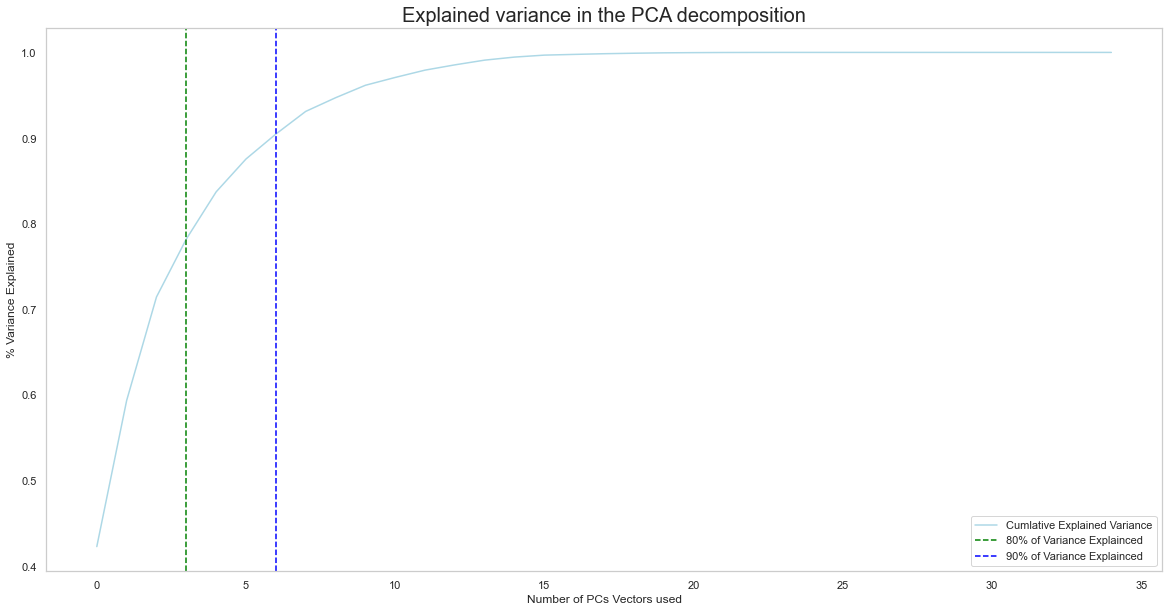

In [260]:
variance_explained_pca = pca.explained_variance_ratio_
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.plot(np.cumsum(variance_explained_pca), color='lightblue', label='Cumlative Explained Variance')
ax.set_title('Explained variance in the PCA decomposition', size=20)
ax.set_xlabel('Number of PCs Vectors used')
ax.set_ylabel('% Variance Explained')
ax.grid(False)
ax.axvline(x=3, label='80% of Variance Explainced', color='green', linestyle='--')
ax.axvline(x=6, label='90% of Variance Explainced', color='blue', linestyle='--')
ax.legend()
plt.show(fig)

##### Visualization of the 3 PCs

In [230]:
X_vis = X_scaled_PCA[:, :3]

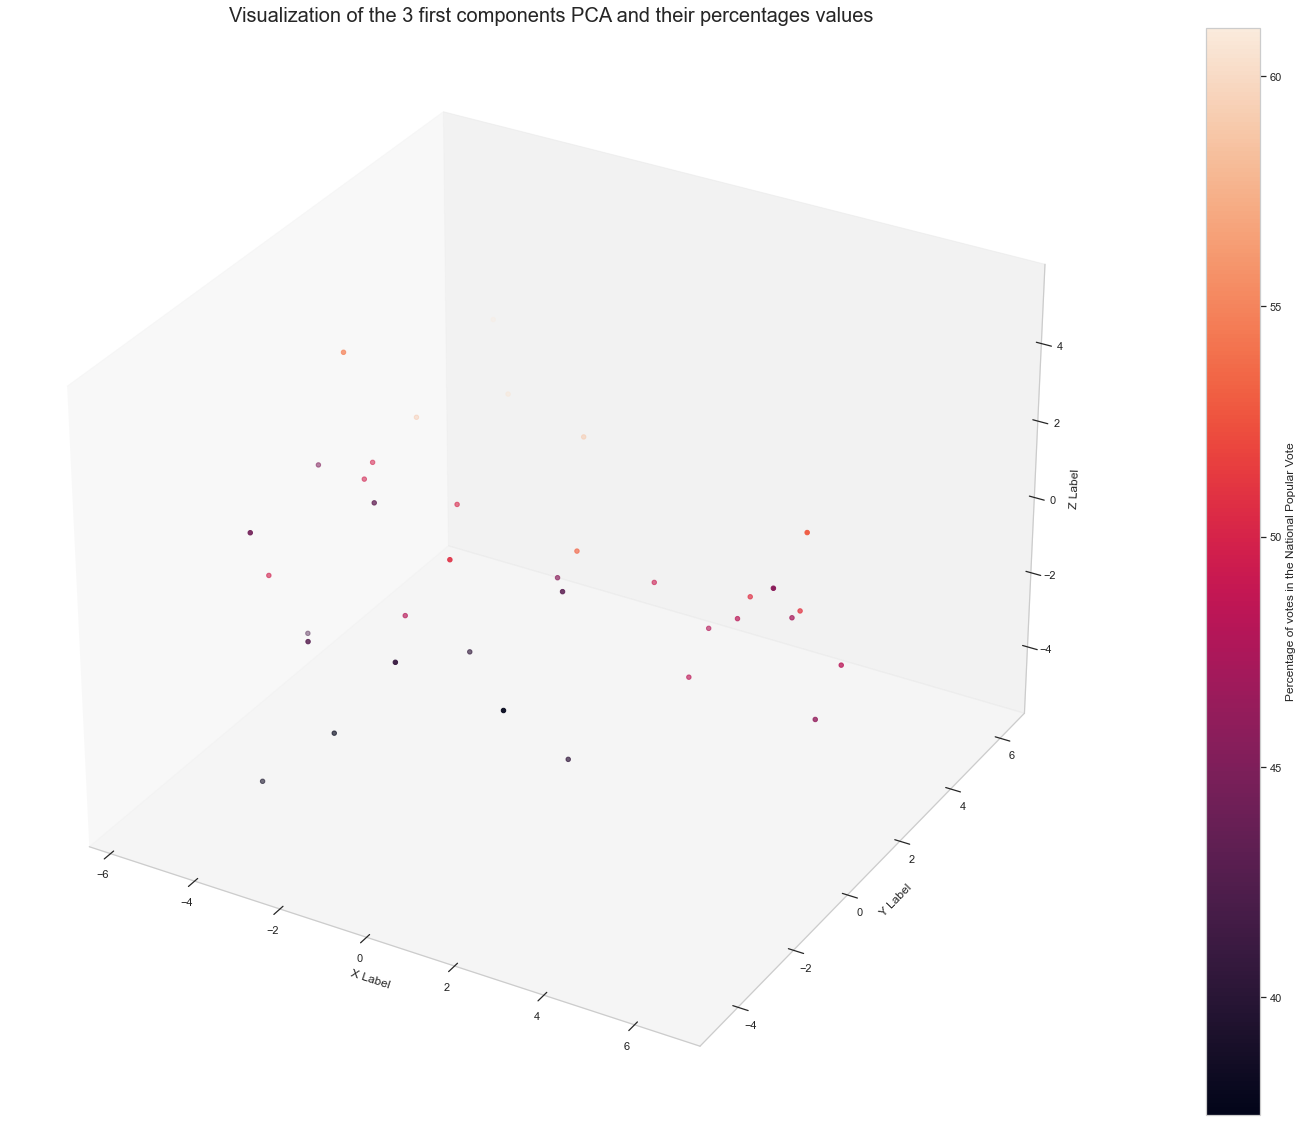

In [261]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111, projection='3d')
surface = ax.scatter(X_vis[:, 0], X_vis[:, 1], X_vis[:, 2], c=y_train)
fig.colorbar(surface, label='Percentage of votes in the National Popular Vote')
ax.grid(False)
ax.set_title('Visualization of the 3 first components PCA and their percentages values', size=20)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
# what you should do:annotate the percentages and dashed lines to the bottom